In [1]:
import pandas as pd
import numpy as np
from pymongo import MongoClient

C:\Users\Alex\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Alex\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\Alex\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
cluster = "mongodb://localhost:27017/"
mongo_client = MongoClient(cluster)

In [3]:
db_sentiment = mongo_client.tweets
db_news = mongo_client.news

In [4]:
sentiment_collection = db_sentiment.TSLA
news_collection = db_news.TSLA

In [5]:
df_sentiment = pd.DataFrame()
df_sentiment = df_sentiment.append(pd.json_normalize(list(sentiment_collection.find({}))))
df_news = pd.DataFrame()
df_news = df_news.append(pd.json_normalize(list(news_collection.find({}))))

C:\Users\Alex\AppData\Local\Temp\ipykernel_17452\3018872213.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sentiment = df_sentiment.append(pd.json_normalize(list(sentiment_collection.find({}))))
C:\Users\Alex\AppData\Local\Temp\ipykernel_17452\3018872213.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_news = df_news.append(pd.json_normalize(list(news_collection.find({}))))


### If using own model

In [6]:
graph_array = []
sentiment_dict = {'positive': 1, 'neutral': 0, 'negative': -1}
for tweet in range(len(df_sentiment)):
    graph_array.append(sentiment_dict[df_sentiment['sentiment'][tweet][0]['label']])
graph_array_news = []
for news in range(len(df_news)):
    graph_array_news.append(sentiment_dict[df_news['sentiment'][news][0]['label']])

In [7]:
df_sentiment['twitter hangulat érték'] = graph_array
df_news['hírcím hangulat érték'] = graph_array_news

### if using VADER model

In [44]:
import nltk
#nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

df_sentiment["VADER_sentiment"] = df_sentiment['text'].apply(sid.polarity_scores)
df_news["VADER_sentiment"] = df_news['title'].apply(sid.polarity_scores)

In [45]:
df_temp_sent= pd.json_normalize(df_sentiment['VADER_sentiment'])

In [46]:
df_sentiment = df_sentiment.join(df_temp_sent)

In [ ]:
df_temp_news= pd.json_normalize(df_news['VADER_sentiment'])
df_news = df_news.join(df_temp_news)

In [ ]:
df_sentiment = df_sentiment.rename(columns={"compound": "twitter hangulat érték"})
df_news = df_news.rename(columns={"compound": "hírcím hangulat érték"})

### Continue from here

In [9]:
df_sentiment.sort_values(by='created_at', inplace=True)
df_news.sort_values(by='date', inplace=True)

In [10]:
df_sentiment['Date'] = df_sentiment['created_at'].astype(str).str[:10]
df_sentiment['Date'] = pd.to_datetime(df_sentiment['Date'])
df_news['Date'] = df_news['date'].astype(str).str[:10]
df_news['Date'] = pd.to_datetime(df_news['Date'])

In [11]:
df_grouped = df_sentiment.groupby(['Date']).mean()
df_grouped_news = df_news.groupby(['Date']).mean()

In [12]:
df_grouped.head()

,verified,user_public_metrics.followers_count,user_public_metrics.following_count,user_public_metrics.tweet_count,user_public_metrics.listed_count,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,public_metrics.impression_count,public_metrics.bookmark_count,twitter hangulat érték
Date,,,,,,,,,,,,
2022-01-01,0.181501,5497.326353,797.537522,24315.936300,70.647469,1.324607,1.964223,17.149215,0.144852,0.0,NaN,0.109075
2022-01-02,0.153751,6748.922503,545.670120,19982.483216,75.462909,1.016162,1.338583,15.329880,0.106092,0.0,NaN,0.159138
2022-01-03,0.170299,11474.771287,715.503033,29095.888789,138.239946,1.067625,1.339250,16.277690,0.186250,0.0,NaN,0.228488
2022-01-04,0.164354,9618.433741,690.160000,26767.263673,112.968163,0.769524,1.051429,11.922449,0.122721,0.0,NaN,0.130340
2022-01-05,0.155039,9246.454574,670.517829,26756.720930,111.321240,1.088992,1.367752,16.072868,0.137674,0.0,NaN,0.081550


## Seasonality analysis

In [18]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pylab import rcParams

<AxesSubplot:xlabel='Date'>

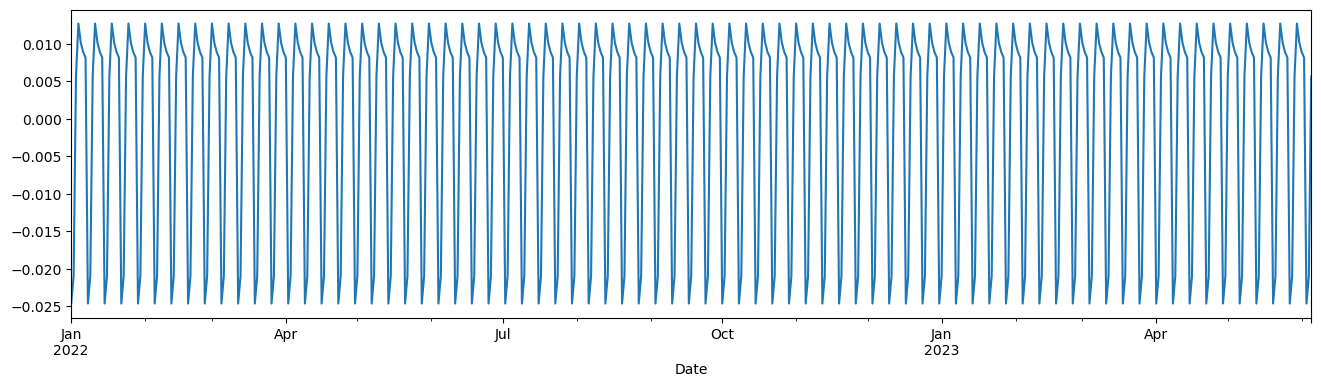

In [19]:
decomposition = sm.tsa.seasonal_decompose(df_grouped["twitter hangulat érték"])
rcParams["figure.figsize"] = 16, 4
decomposition.seasonal.plot()

## Trend Analysis

<AxesSubplot:xlabel='Date'>

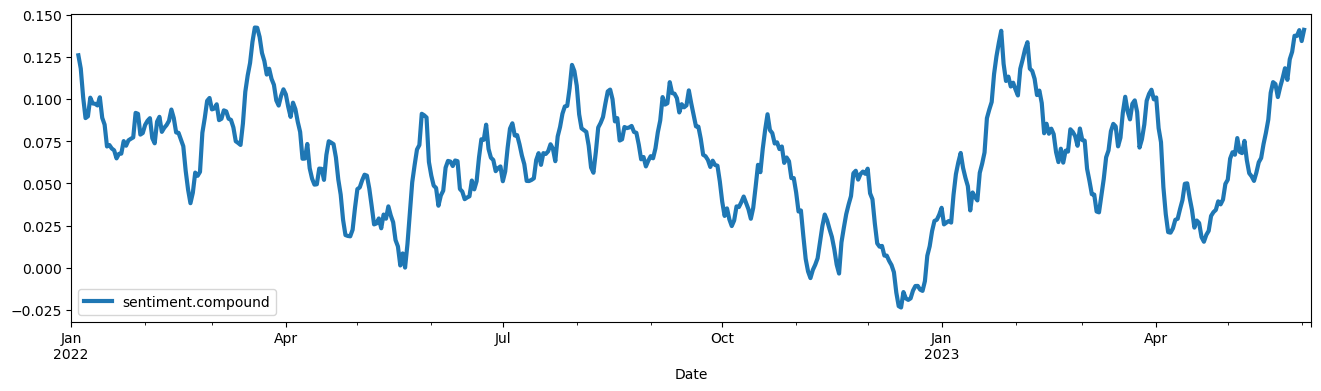

In [21]:
trend_dict = {}

decomposition = sm.tsa.seasonal_decompose(df_grouped["twitter hangulat érték"].dropna())
# Store back the results
trend_dict["sentiment.compound"] = decomposition.trend

pd.DataFrame(trend_dict).plot(layout=(4, 3), linewidth=3)

## Noise

<AxesSubplot:xlabel='Date'>

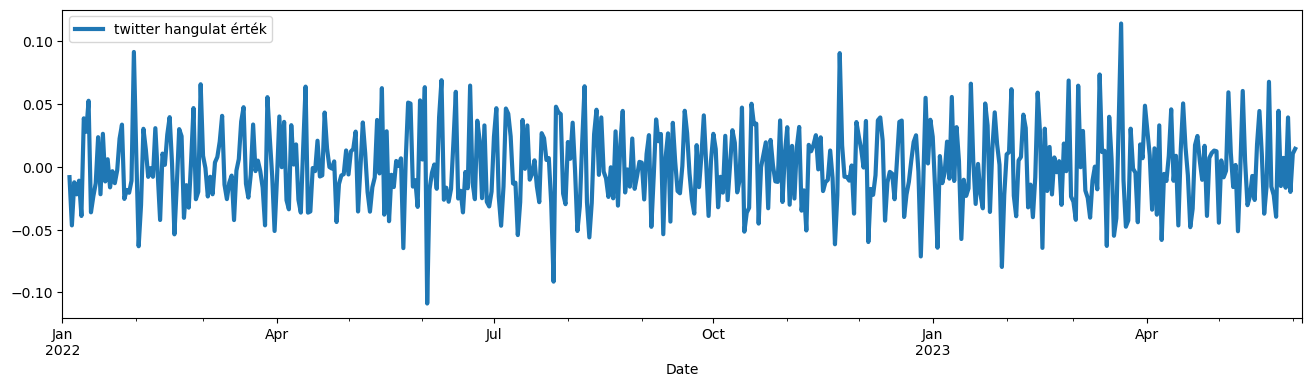

In [22]:
resid_dict  = {}

decomposition = sm.tsa.seasonal_decompose(df_grouped["twitter hangulat érték"].dropna())
# Store back the results
resid_dict["twitter hangulat érték"] = decomposition.resid

pd.DataFrame(resid_dict ).plot(layout=(4, 3), linewidth=3)

## Working With Multiple Time Series

In [23]:
import yfinance as yf

stock_ticker ='TSLA'
ticker = yf.Ticker(stock_ticker)
tsla_historical = ticker.history(start="2022-01-01", end="2023-06-05", prepost=True, actions=False)
tsla_historical.index = tsla_historical.index.astype(str).str[:10]
tsla_historical.index = pd.to_datetime(tsla_historical.index)
tsla_historical

,Open,High,Low,Close,Volume
Date,,,,,
2022-01-03,382.583344,400.356659,378.679993,399.926666,103931400
2022-01-04,396.516663,402.666656,374.350006,383.196655,100248300
2022-01-05,382.216675,390.113342,360.336670,362.706665,80119800
2022-01-06,359.000000,362.666656,340.166656,354.899994,90336600
2022-01-07,360.123322,360.309998,336.666656,342.320007,84164700
...,...,...,...,...,...
2023-05-26,184.619995,198.600006,184.529999,193.169998,162061500
2023-05-30,200.100006,204.479996,197.529999,201.160004,128818700
2023-05-31,199.779999,203.949997,195.119995,203.929993,150711700


In [24]:
merged = tsla_historical.merge(df_grouped, on='Date', how='inner')
merged = merged.merge(df_grouped_news, on='Date', how='inner')

In [25]:
merged.head()

,Open,High,Low,Close,Volume,verified,user_public_metrics.followers_count,user_public_metrics.following_count,user_public_metrics.tweet_count,user_public_metrics.listed_count,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,public_metrics.impression_count,public_metrics.bookmark_count,twitter hangulat érték,hírcím hangulat érték
Date,,,,,,,,,,,,,,,,,,
2022-01-03,382.583344,400.356659,378.679993,399.926666,103931400,0.170299,11474.771287,715.503033,29095.888789,138.239946,1.067625,1.339250,16.277690,0.186250,0.0,NaN,0.228488,0.200000
2022-01-04,396.516663,402.666656,374.350006,383.196655,100248300,0.164354,9618.433741,690.160000,26767.263673,112.968163,0.769524,1.051429,11.922449,0.122721,0.0,NaN,0.130340,0.041667
2022-01-05,382.216675,390.113342,360.336670,362.706665,80119800,0.155039,9246.454574,670.517829,26756.720930,111.321240,1.088992,1.367752,16.072868,0.137674,0.0,NaN,0.081550,0.052632
2022-01-06,359.000000,362.666656,340.166656,354.899994,90336600,0.193267,11498.933084,784.880715,28336.328346,125.816708,0.953450,1.368246,14.888196,0.131338,0.0,NaN,0.097672,0.105263
2022-01-07,360.123322,360.309998,336.666656,342.320007,84164700,0.169510,8872.429896,641.662834,26344.413576,108.914688,0.759644,1.389837,13.955861,0.136128,0.0,NaN,0.074926,0.000000


In [26]:
merged['Árfolyam változás'] = merged['Close'].diff()
merged = merged.iloc[1: , :]

In [27]:
merged = merged[['Árfolyam változás', 'twitter hangulat érték', 'hírcím hangulat érték']]

Text(0, 0.5, 'Value')

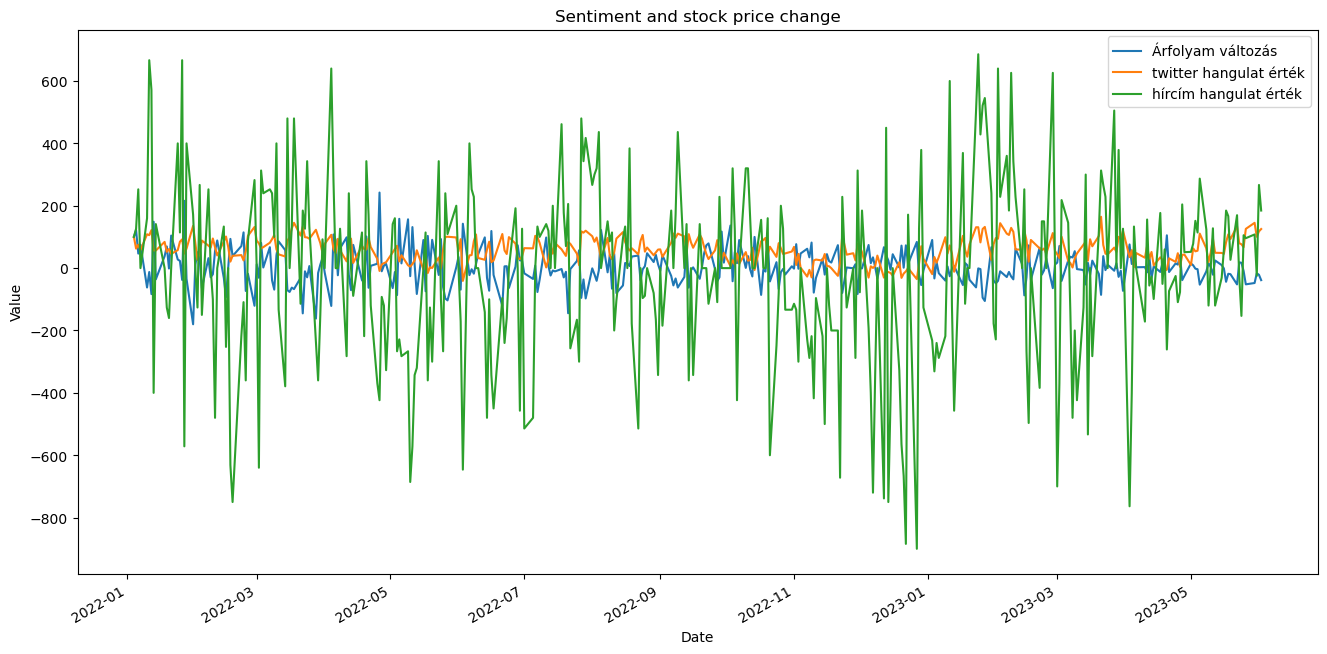

In [29]:
import matplotlib.pyplot as plt

normalized = merged.div(merged.iloc[0]).mul(100)  # Multiply by 100 to get percentages

normalized.plot(figsize=(16, 8), 
    title="Sentiment and stock price change")
plt.xlabel("Date")
plt.ylabel("Value")

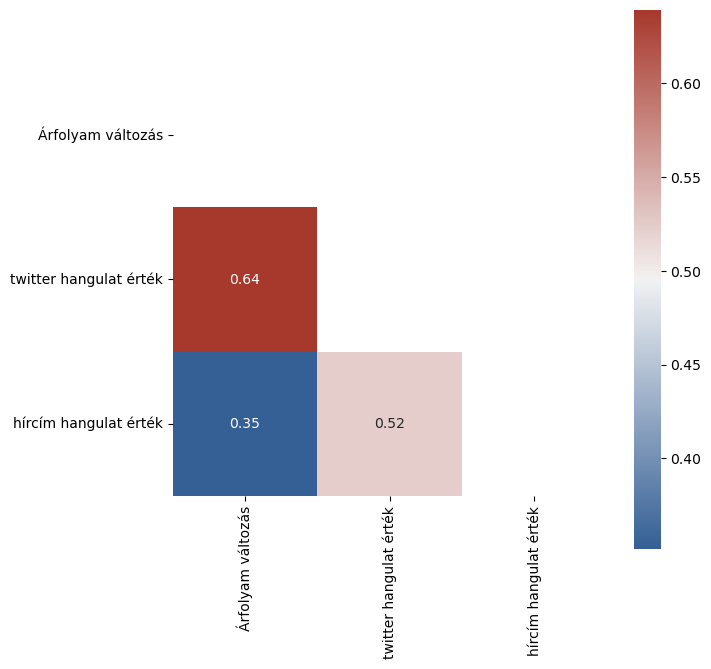

In [30]:
import seaborn as sns

# Create a custom palette
cmap = sns.diverging_palette(250, 15, s=75, l=40, n=9, center="light", as_cmap=True)

# Compute corr matrix
matrix = merged.corr(method="pearson")
# Create a mask
mask = np.triu(np.ones_like(matrix, dtype=bool))

fig, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(matrix, mask=mask, cmap=cmap, square=True, annot=True, fmt=".2f", ax=ax)
plt.show();

In [31]:
merged["twitter hangulat lag-1"] = merged['twitter hangulat érték'].shift(periods=1)
merged["twitter hangulat lag-2"] = merged["twitter hangulat érték"].shift(periods=2)
merged["twitter hangulat lag+1"] = merged['twitter hangulat érték'].shift(periods=-1)
merged["twitter hangulat lag+2"] = merged["twitter hangulat érték"].shift(periods=-2)
merged["hírcim hangulat lag-1"] = merged["hírcím hangulat érték"].shift(periods=1)
merged["hírcim hangulat lag-2"] = merged["hírcím hangulat érték"].shift(periods=2)
merged["hírcim hangulat lag+1"] = merged["hírcím hangulat érték"].shift(periods=-1)
merged["hírcim hangulat lag+2"] = merged["hírcím hangulat érték"].shift(periods=-2)

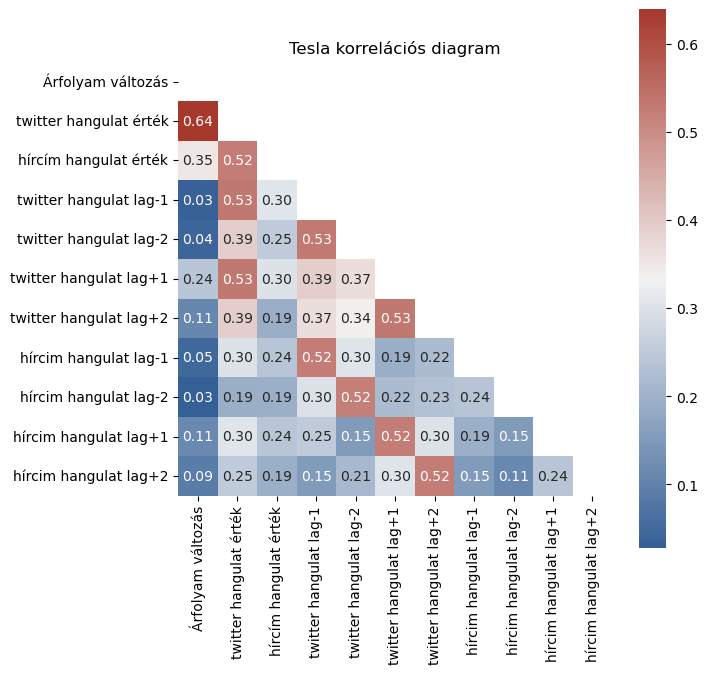

In [35]:
# Create a custom palette
cmap = sns.diverging_palette(250, 15, s=75, l=40, n=9, center="light", as_cmap=True)

# Compute corr matrix
matrix = merged.corr(method="pearson")
# Create a mask
mask = np.triu(np.ones_like(matrix, dtype=bool))

fig, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(matrix, mask=mask, cmap=cmap, square=True, annot=True, fmt=".2f", ax=ax).set_title('Tesla korrelációs diagram')
plt.show();

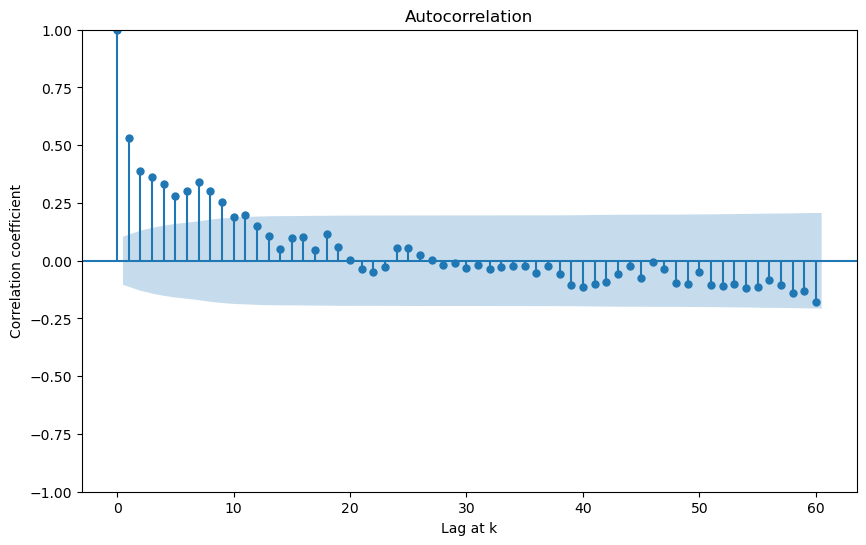

In [34]:
from statsmodels.graphics import tsaplots

rcParams["figure.figsize"] = 10, 6

# Stands for Time Series Analysis Plots (TSA Plots)
fig = tsaplots.plot_acf(merged["twitter hangulat érték"], lags=60)

plt.xlabel("Lag at k")
plt.ylabel("Correlation coefficient")
plt.show()